# Case Study on Probability for Data Science

Problem Statement: 
To make a suitable machine learning algorithm to predict if the mushroom is 
edible or poisonous (e or p) using the given dataset.
(Along with other ML algorithms, Naïve Bayes’ Classifier should be applied)
Also, if some data pre-processing is necessary do that as well.

In [1]:
# Import the required libraries and load the dataset 
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
Mushroom = pd.read_csv('mushrooms.csv')

In [4]:
# Check the first few rows and see if the dataset is loaded
Mushroom.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


# Understanding the data

In [3]:
# use info function to see the columns, datatypes, no. of rows and existence of nulls
Mushroom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [5]:
# The target column is 'class' which classifies the mushroom as "Edible" ('e') or "Poisonous"('e') 
Mushroom['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

C:\Users\silpa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


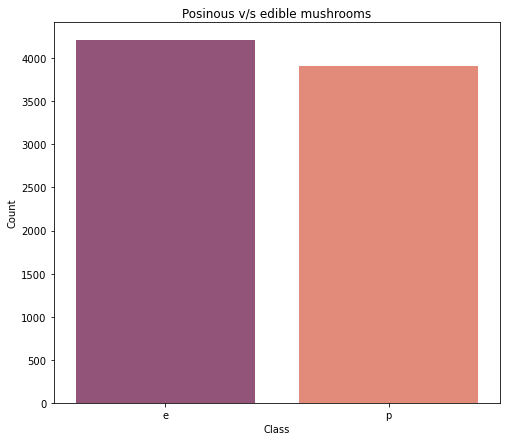

In [9]:
# Visualizing the counts of edible v/s poisonous mushrooms
nums = Mushroom['class'].value_counts()
plt.figure(figsize=(8,7))
sns.barplot(nums.index, nums.values, alpha=0.8, palette="rocket")
plt.ylabel('Count', fontsize=10)
plt.xlabel('Class', fontsize=10)
plt.title('Posinous v/s edible mushrooms')
plt.show()

# From the above visualization for "Class" of mushrooms  we can understand that there is almost an equal distribution of edible & poisonous mushrooms even though the edible has a slight edge over poisonous

# Encoding

In [11]:
# All the columns in the dataset are of 'object' type. Before encoding, we need to convert the columns to categorical type .
Mushroom = Mushroom.astype('category')

In [12]:
# Let's see if columns are converted to the dataype "Category" or not
Mushroom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   class                     8124 non-null   category
 1   cap-shape                 8124 non-null   category
 2   cap-surface               8124 non-null   category
 3   cap-color                 8124 non-null   category
 4   bruises                   8124 non-null   category
 5   odor                      8124 non-null   category
 6   gill-attachment           8124 non-null   category
 7   gill-spacing              8124 non-null   category
 8   gill-size                 8124 non-null   category
 9   gill-color                8124 non-null   category
 10  stalk-shape               8124 non-null   category
 11  stalk-root                8124 non-null   category
 12  stalk-surface-above-ring  8124 non-null   category
 13  stalk-surface-below-ring  8124 non-null   catego

In [14]:
# Let's use LabelEncoder so that the alphanumerical values in each of the columns get converted to a number
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in Mushroom.columns:
    Mushroom[col] = le.fit_transform(Mushroom[col])

In [15]:
# Let's see if the columns have changed to numerical dataype of not
Mushroom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   class                     8124 non-null   int32
 1   cap-shape                 8124 non-null   int32
 2   cap-surface               8124 non-null   int32
 3   cap-color                 8124 non-null   int32
 4   bruises                   8124 non-null   int32
 5   odor                      8124 non-null   int32
 6   gill-attachment           8124 non-null   int32
 7   gill-spacing              8124 non-null   int32
 8   gill-size                 8124 non-null   int32
 9   gill-color                8124 non-null   int32
 10  stalk-shape               8124 non-null   int32
 11  stalk-root                8124 non-null   int32
 12  stalk-surface-above-ring  8124 non-null   int32
 13  stalk-surface-below-ring  8124 non-null   int32
 14  stalk-color-above-ring    8124 non-null 

In [16]:
# Verify if encoding is done on all the columns by checking the first few rows as sample
Mushroom.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


# Data Pre - processing

In [17]:
# We could notice that the veil-type is having the value of zero for all the rows
Mushroom['veil-type'].value_counts()

0    8124
Name: veil-type, dtype: int64

In [19]:
# Since the "veil-type" column does not produce any variance, let's drop it
Mushroom = Mushroom.drop(["veil-type"],axis=1)

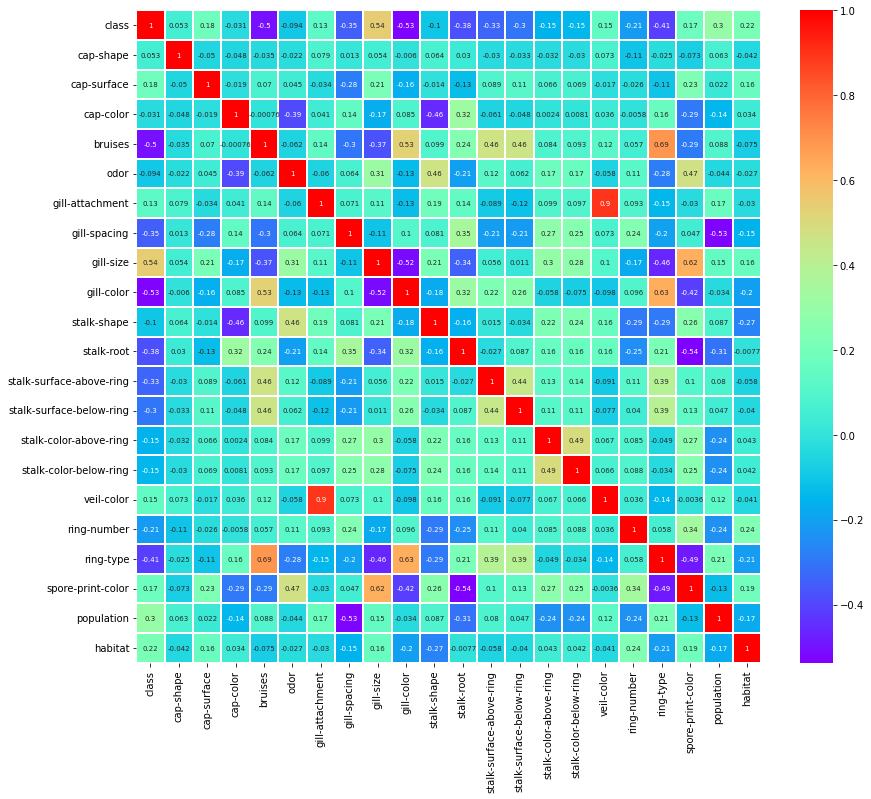

In [21]:
# Checking the correlation between the variables
plt.figure(figsize=(14,12))
sns.heatmap(Mushroom.corr(),linewidths=.1,cmap="rainbow", annot=True, annot_kws={"size": 7})
plt.yticks(rotation=0);


High correlation between veil-color and gill-attachment . Let's drop one of the columns

In [22]:
Mushroom = Mushroom.drop(["gill-attachment"],axis=1)

Moderately high correlation between bruises and ring-type. Let's drop one of the columns

In [61]:
Mushroom = Mushroom.drop(["bruises"],axis=1)

In [62]:
# Checking the dataset after pre-processing
Mushroom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   class                     8124 non-null   int32
 1   cap-shape                 8124 non-null   int32
 2   cap-surface               8124 non-null   int32
 3   cap-color                 8124 non-null   int32
 4   odor                      8124 non-null   int32
 5   gill-spacing              8124 non-null   int32
 6   gill-size                 8124 non-null   int32
 7   gill-color                8124 non-null   int32
 8   stalk-shape               8124 non-null   int32
 9   stalk-root                8124 non-null   int32
 10  stalk-surface-above-ring  8124 non-null   int32
 11  stalk-surface-below-ring  8124 non-null   int32
 12  stalk-color-above-ring    8124 non-null   int32
 13  stalk-color-below-ring    8124 non-null   int32
 14  veil-color                8124 non-null 

# After data study and pre-processing, we have reduced the numbder of features from 21 to 18 ( 3 columns removed ) 

# Model Preparation

In [63]:
# Drop target column in X and Y is the target column Class
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, auc, roc_curve

X = Mushroom.drop(['class'], axis=1)
y = Mushroom['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

# Model Number 1 - Logistic regression

In [64]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver="lbfgs", max_iter=500)
lr.fit(X_train, y_train)
print("Percentage Test Accuracy: {}%".format(round(lr.score(X_test, y_test)*100,2)))

Percentage Test Accuracy: 94.71%


In [65]:
y_pred_lr = lr.predict(X_test)
print("Log Regression Classification report: \n\n", classification_report(y_test, y_pred_lr))

Log Regression Classification report: 

               precision    recall  f1-score   support

           0       0.95      0.95      0.95       843
           1       0.94      0.95      0.95       782

    accuracy                           0.95      1625
   macro avg       0.95      0.95      0.95      1625
weighted avg       0.95      0.95      0.95      1625



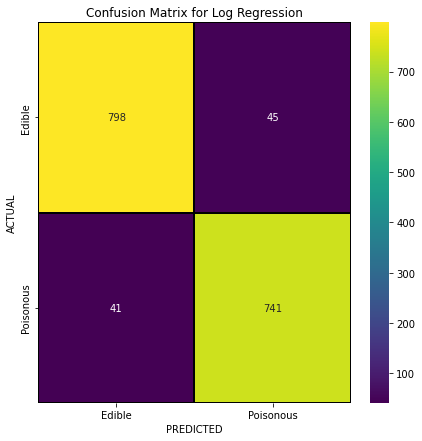

In [66]:
cm = confusion_matrix(y_test, y_pred_lr)
x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="viridis", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED")
plt.ylabel("ACTUAL")
plt.title('Confusion Matrix for Log Regression')
plt.show()

# Model Number 2 - K nearest neighbours

In [68]:
from sklearn.neighbors import KNeighborsClassifier
apt_Kvalue = 0
apt_score = 0
for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    if knn.score(X_test, y_test) > apt_score:
        apt_score = knn.score(X_train, y_train)
        apt_Kvalue = i
        
print("Most apt KNN Value: {}".format(apt_Kvalue))
print("Percentage Test Accuracy: {}%".format(round(apt_score*100,2)))

Most apt KNN Value: 1
Percentage Test Accuracy: 100.0%


In [69]:
y_pred_knn = knn.predict(X_test)
print("KNN Classifier report: \n\n", classification_report(y_test, y_pred_knn))

KNN Classifier report: 

               precision    recall  f1-score   support

           0       1.00      0.99      0.99       843
           1       0.99      1.00      0.99       782

    accuracy                           0.99      1625
   macro avg       0.99      0.99      0.99      1625
weighted avg       0.99      0.99      0.99      1625



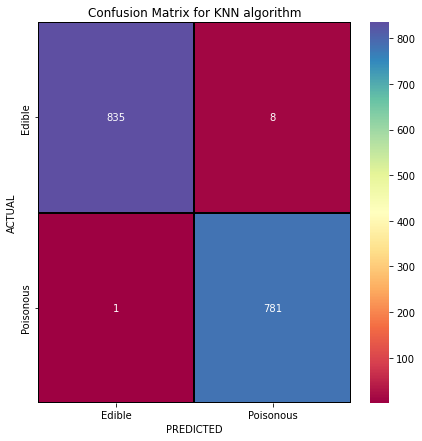

In [70]:
cm = confusion_matrix(y_test, y_pred_knn)
x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Spectral", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED")
plt.ylabel("ACTUAL")
plt.title('Confusion Matrix for KNN algorithm')
plt.show()

# Model Number 3 - Support vector Machine

In [72]:
from sklearn.svm import SVC
svm = SVC(random_state=42, gamma="auto")
svm.fit(X_train, y_train)
print("SVM Test Accuracy: {}%".format(round(svm.score(X_test, y_test)*100, 2)))

SVM Test Accuracy: 99.88%


In [73]:
y_pred_svm = svm.predict(X_test)
print("SVM Classification report: \n\n", classification_report(y_test, y_pred_svm))

SVM Classification report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



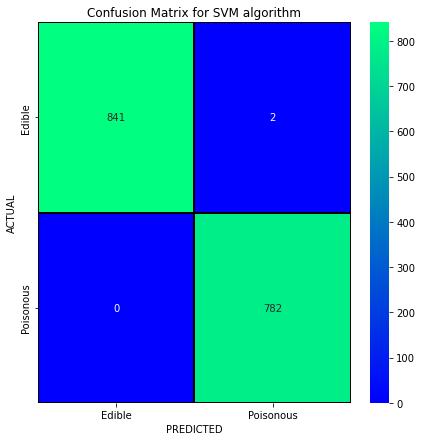

In [74]:
cm = confusion_matrix(y_test, y_pred_svm)
x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="winter", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED")
plt.ylabel("ACTUAL")
plt.title('Confusion Matrix for SVM algorithm')
plt.show()

# Model Number 4 - Naive Bayes' Classifier

In [75]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)
print("Naive bayes Test Accuracy: {}%".format(round(nb.score(X_test, y_test)*100, 2)))

Naive bayes Test Accuracy: 90.34%


In [76]:
y_pred_nb = nb.predict(X_test)
print("Naive Bayes Classification report: \n\n", classification_report(y_test, y_pred_nb))

Naive Bayes Classification report: 

               precision    recall  f1-score   support

           0       0.94      0.87      0.90       843
           1       0.87      0.94      0.90       782

    accuracy                           0.90      1625
   macro avg       0.90      0.90      0.90      1625
weighted avg       0.91      0.90      0.90      1625



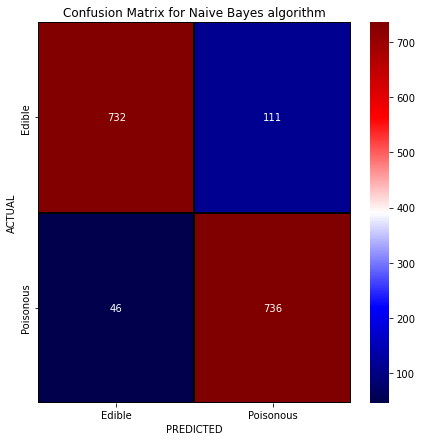

In [77]:
cm = confusion_matrix(y_test, y_pred_nb)
x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="seismic", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED")
plt.ylabel("ACTUAL")
plt.title('Confusion Matrix for Naive Bayes algorithm')
plt.show()

# Model Number 5 - Random forest Classifier

In [79]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
print("Random forest Test Accuracy: {}%".format(round(rf.score(X_test, y_test)*100, 2)))

Random forest Test Accuracy: 100.0%


In [80]:
y_pred_rf = rf.predict(X_test)
print("Random Forest Classification report: \n\n", classification_report(y_test, y_pred_rf))

Random Forest Classification report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



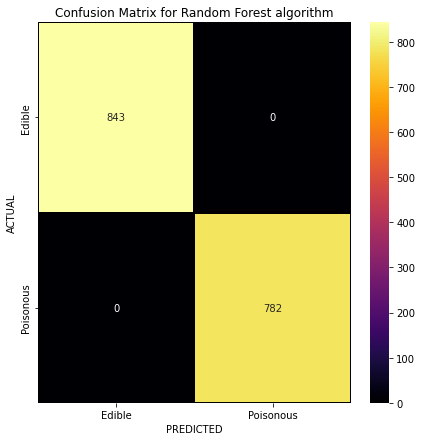

In [82]:
cm = confusion_matrix(y_test, y_pred_rf)
x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="inferno", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED")
plt.ylabel("ACTUAL")
plt.title('Confusion Matrix for Random Forest algorithm')
plt.show()

Conclusion

>>Naive Baye's Classification was tried and compared with other unsupervised machine learning models as part of the case study
Compared to other methods, Naive Baye's classifiaction model gave lesser prediction accuracy

>>The KNN & random forest algorithm gave an accuracy score of cent percent and SVM produced a score of almost cent percent (99.88%)

>>Therefore, it is better to depend on KNN or random forest algorithm for predicting the edibility of mushrooms than depending on Naive Bayes' algorithm

Submitted by Viswaraj Chandran